The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables. 

Dataset: cars-dataset.csvView in a new window

Attribute Information:

Car Name – Name of the car

Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Accleration – continuous

Yr – Model of the car – Multivalued discrete

Steps to follow:

1) EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

2) Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

3) Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

4) Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
df_cars = pd.read_csv('cars-dataset.csv')

In [27]:
print ('**********Describe**********************')
print (df_cars.describe(include = 'all').transpose())

print ('**********Info**********************')
print (df_cars.info())

print ('**********Shape**********************')

print (df_cars.shape)

print ('**********Is NA Count**********************')
print (df_cars.isna().sum())


print ('**********Is Null**********************')

print (df_cars.isnull().any(axis=0))

**********Describe**********************
         count unique         top freq     mean      std   min      25%  \
car name   398    305  ford pinto    6      NaN      NaN   NaN      NaN   
cyl        398    NaN         NaN  NaN  5.45477    1.701     3        4   
disp       398    NaN         NaN  NaN  193.426   104.27    68   104.25   
hp         392    NaN         NaN  NaN  104.469  38.4912    46       75   
wt         398    NaN         NaN  NaN  2970.42  846.842  1613  2223.75   
acc        398    NaN         NaN  NaN  15.5681  2.75769     8   13.825   
yr         398    NaN         NaN  NaN  76.0101  3.69763    70       73   
mpg        398    NaN         NaN  NaN  23.5146  7.81598     9     17.5   

             50%     75%   max  
car name     NaN     NaN   NaN  
cyl            4       8     8  
disp       148.5     262   455  
hp          93.5     126   230  
wt        2803.5    3608  5140  
acc         15.5  17.175  24.8  
yr            76      79    82  
mpg           23   

In [25]:
df_cars['hp'] = pd.to_numeric(df_cars['hp'], errors='coerce')

In [26]:
print ('**********Is NA Count**********************')
print (df_cars.isna().sum())

**********Is NA Count**********************
car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64


 ### (2) Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

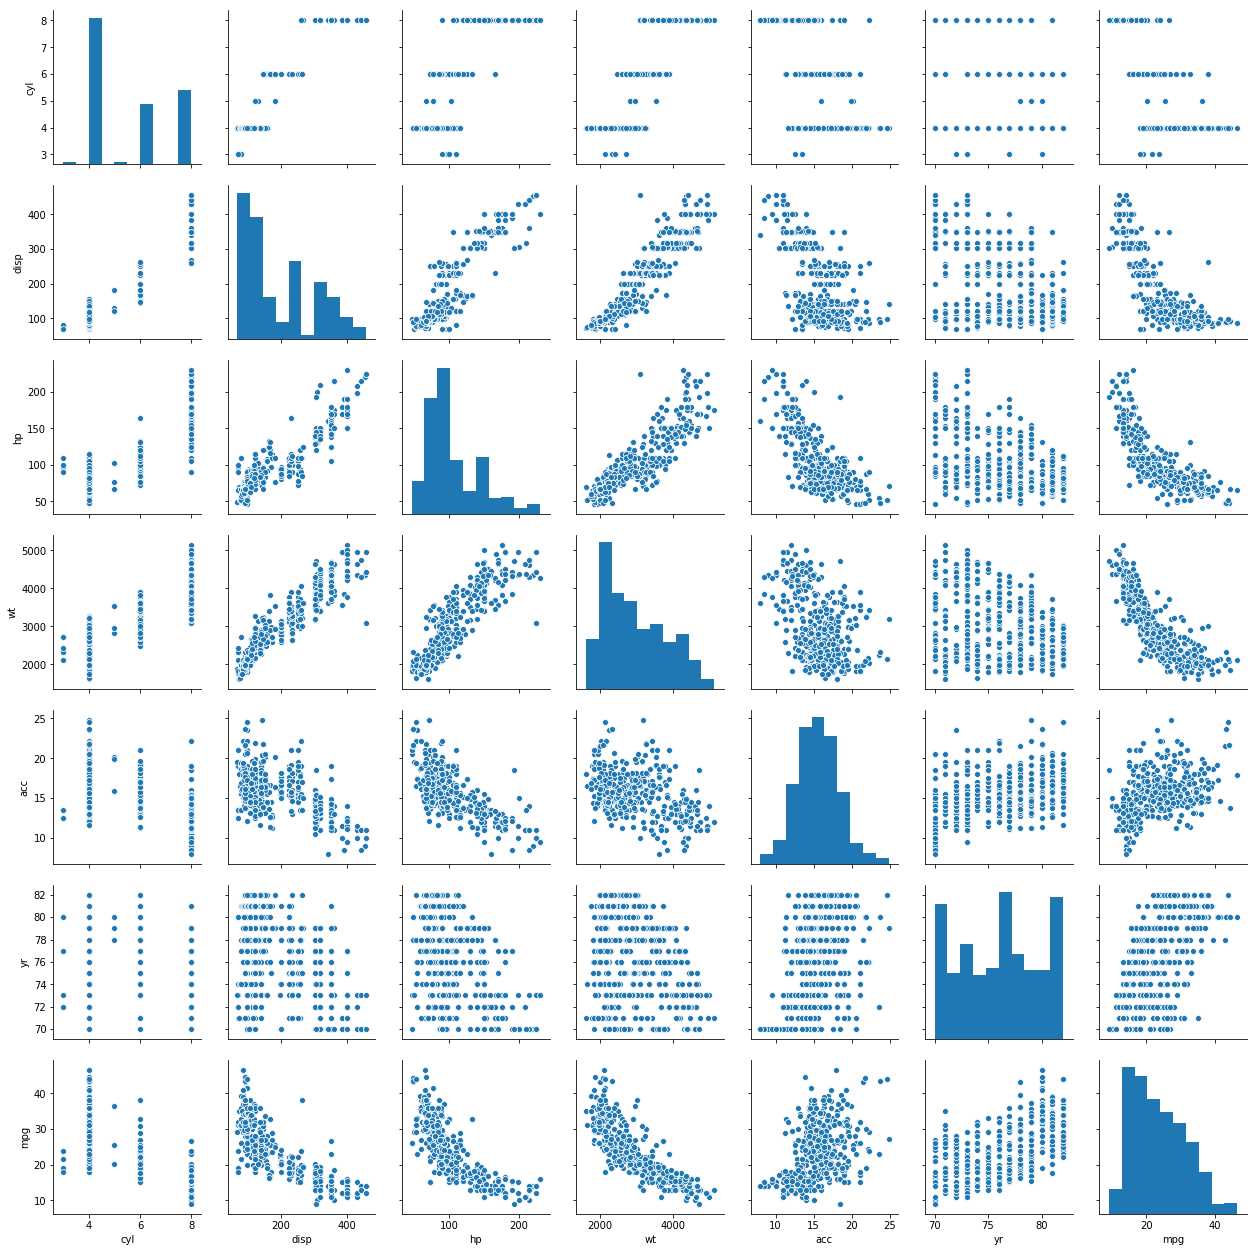

In [30]:
sns.pairplot(df_cars)

C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greate

ZeroDivisionError: 0.0 cannot be raised to a negative power

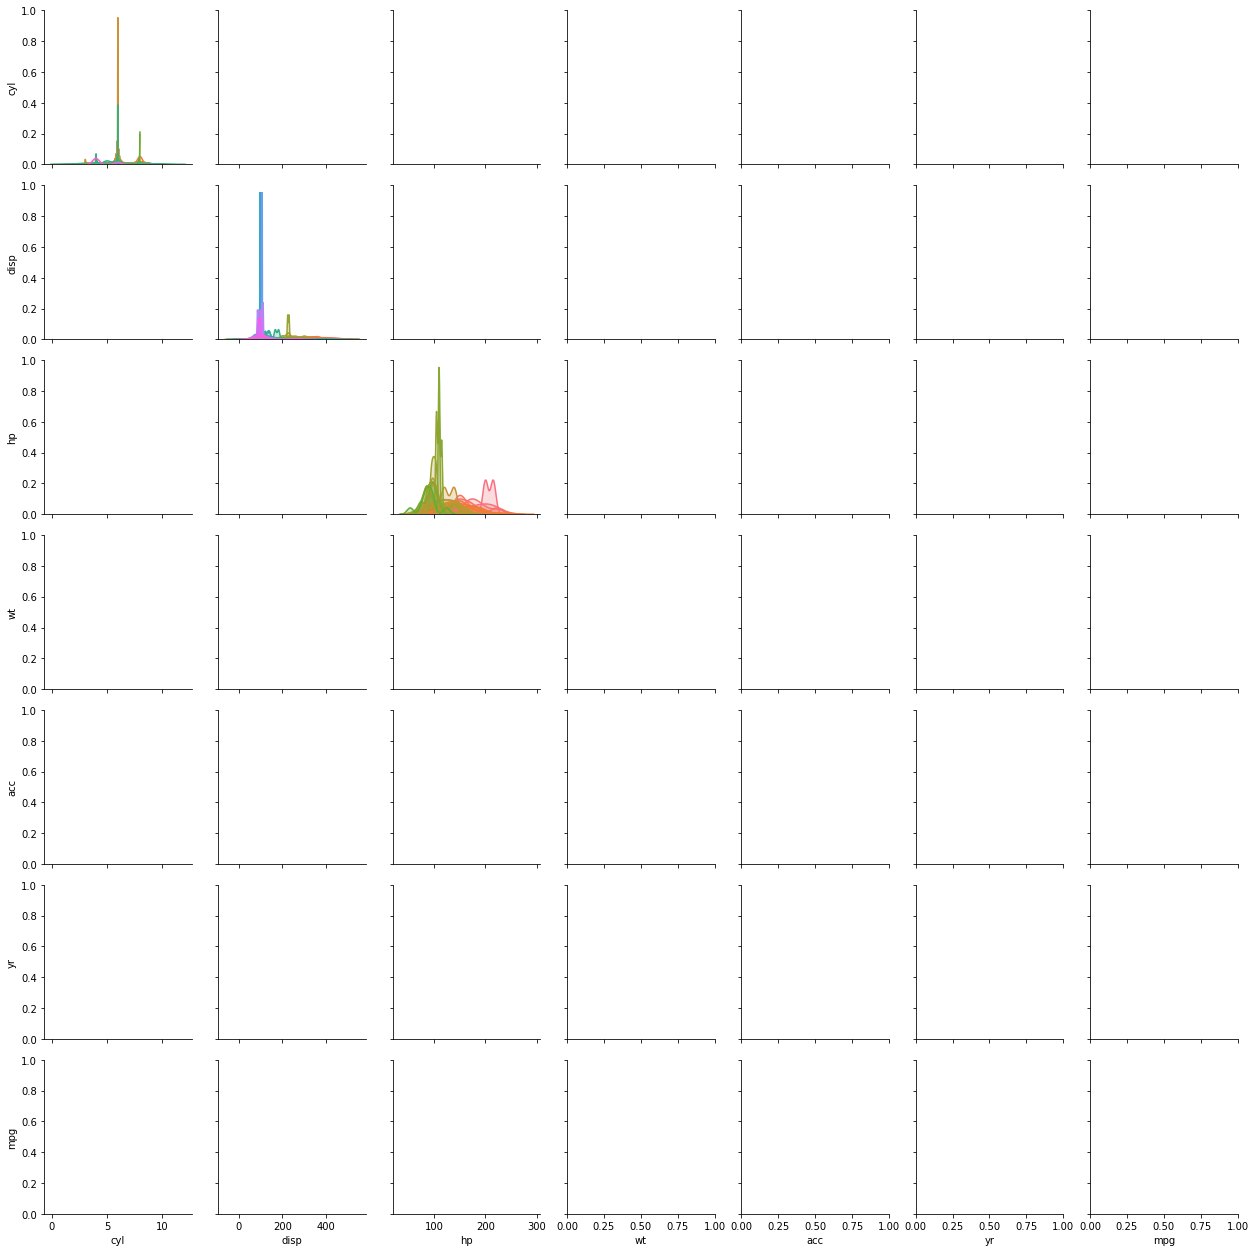

In [29]:
sns.pairplot(df_cars, hue = 'mpg')

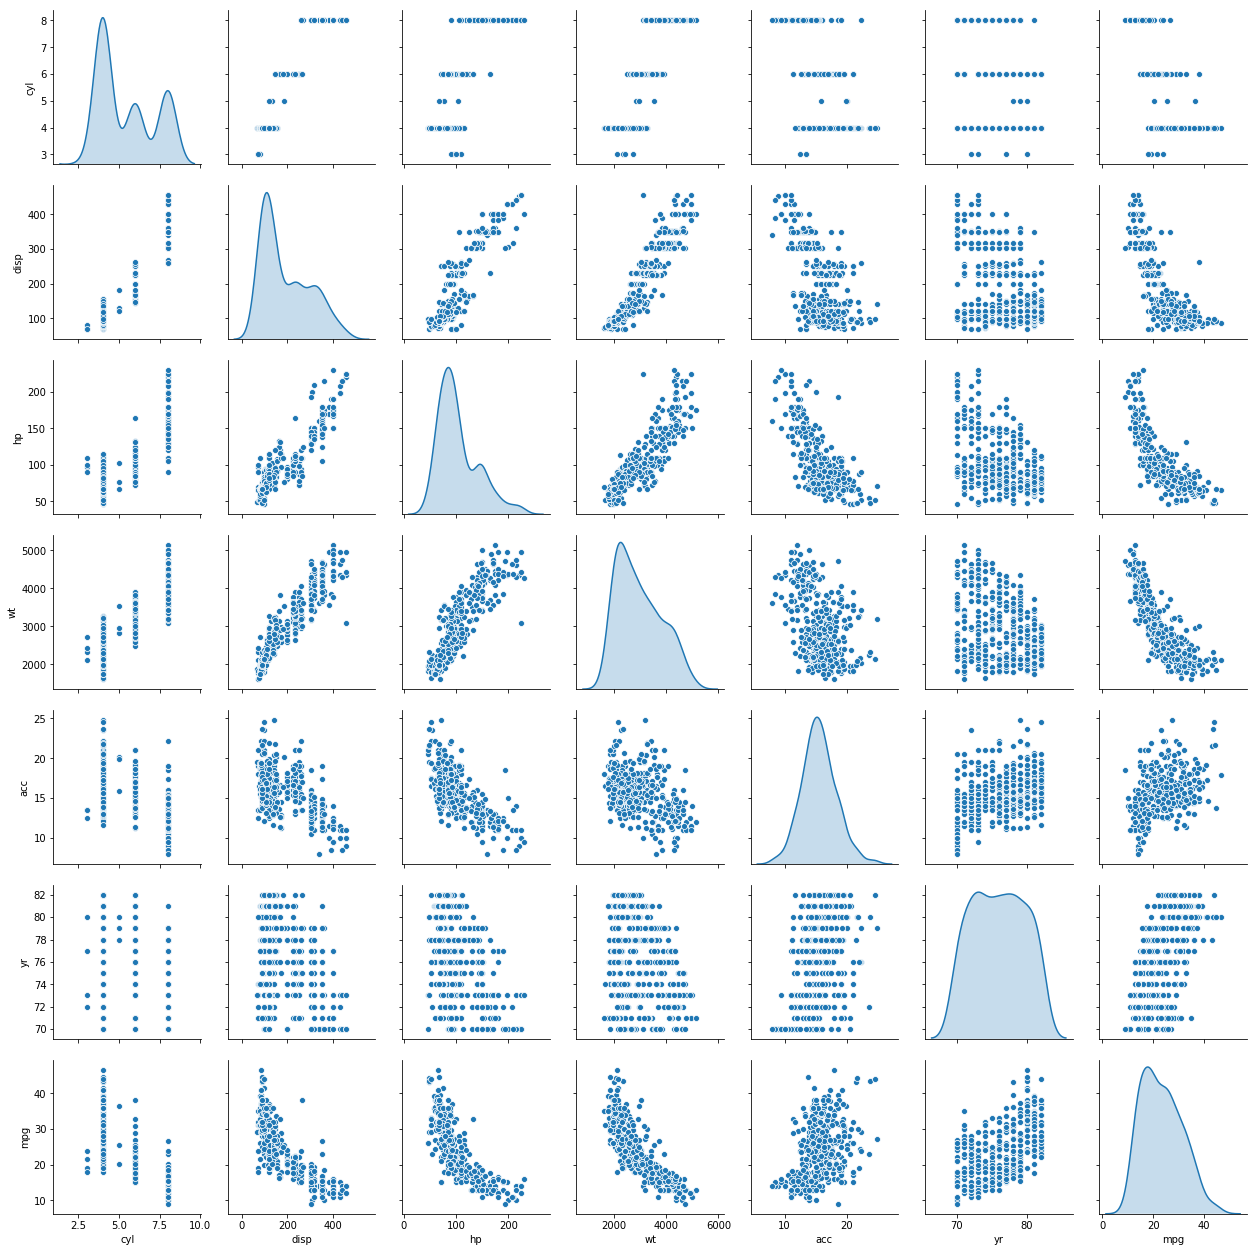

In [31]:
sns.pairplot(df_cars, diag_kind = 'kde')